In [ ]:
# def normalize(column):
#     return (column - column.min()) / (column.max() - column.min())

# def denormalize(column, original_column):
#     return column * (original_column.max() - original_column.min()) + original_column.min()

In [2]:
# Subiectul 1 
# a
import pandas as pd
import pymc as pm
import arviz as az

file_path = "date_alegeri_turul2.csv"
data = pd.read_csv(file_path)

data['Varsta_norm'] = (data['Varsta'] - data['Varsta'].mean()) / data['Varsta'].std()
data['Venit_norm'] = (data['Venit'] - data['Venit'].mean()) / data['Venit'].std()

X = data[['Varsta_norm', 'Sex', 'Educatie', 'Venit_norm']].values
y = data['Vot'].values

with pm.Model() as model:
    beta = pm.Normal("beta", mu=0, sigma=10, shape=X.shape[1])
    intercept = pm.Normal("intercept", mu=0, sigma=10)

    logits = intercept + pm.math.dot(X, beta)
    p = pm.Deterministic("p", pm.math.sigmoid(logits))

    y_obs = pm.Bernoulli("y_obs", p=p, observed=y)
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, random_seed=42)

summary = az.summary(trace)
print(summary)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, intercept]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]    0.291  0.129   0.054    0.535      0.001    0.001    8789.0   
beta[1]   -0.853  0.254  -1.328   -0.378      0.003    0.002    8111.0   
beta[2]    0.617  0.161   0.307    0.906      0.002    0.001    8628.0   
beta[3]    1.014  0.140   0.757    1.279      0.002    0.001    8427.0   
intercept  1.536  0.244   1.100    2.007      0.003    0.002    7005.0   
...          ...    ...     ...      ...        ...      ...       ...   
p[495]     0.981  0.007   0.968    0.993      0.000    0.000    9472.0   
p[496]     0.681  0.053   0.584    0.778      0.001    0.000    8652.0   
p[497]     0.887  0.021   0.848    0.925      0.000    0.000    8625.0   
p[498]     0.878  0.030   0.821    0.932      0.000    0.000    8311.0   
p[499]     0.949  0.017   0.917    0.977      0.000    0.000    9756.0   

           ess_tail  r_hat  
beta[0]      5567.0    1.0  
beta[1]      6295.0    1.0  
beta[2]      5500.0    1

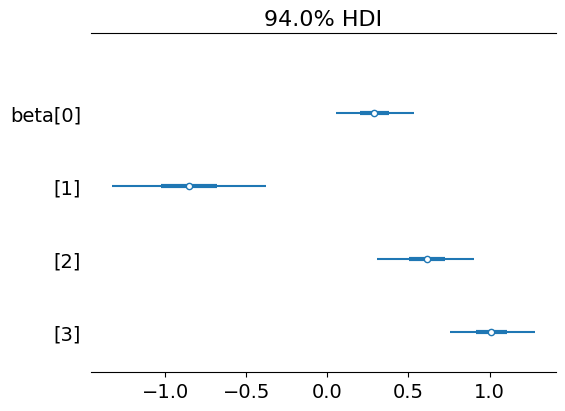

In [3]:
az.plot_forest(trace, var_names=["beta"], combined=True, hdi_prob=0.94);

In [ ]:
# b

# Variabilele care influenteaza cel mai mult rezultatul sunt cele care au coeficentul cel mai mare beta
# Astfel observa, ca beta[2] si beta[3] au cel mai mare 
# Atributul Educatie si Venit_norm au cel mai mare impact 

In [ ]:
# c
import numpy as np
import matplotlib.pyplot as plt


educatie_range = np.linspace(data['Educatie'].min(), data['Educatie'].max(), 100)
venit_range = np.linspace(data['Venit_norm'].min(), data['Venit_norm'].max(), 100)
educatie_grid, venit_grid = np.meshgrid(educatie_range, venit_range)

grid_points = np.c_[educatie_grid.ravel(), venit_grid.ravel()]


In [ ]:
# d

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [weights, mus, sigmas]
>CategoricalGibbsMetropolis: [cluster]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 24 seconds.
/Users/serban.chisca/git-workspace/PMP-Chisca-Serban-3B2/env/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
weights[0]    0.332  0.038   0.265    0.406      0.001    0.000    2951.0   
weights[1]    0.334  0.071   0.211    0.459      0.012    0.009      36.0   
weights[2]    0.334  0.071   0.215    0.463      0.012    0.009      37.0   
mus[0, 0]    -1.016  0.060  -1.119   -0.901      0.001    0.001    2859.0   
mus[0, 1]     0.857  0.129   0.637    1.114      0.002    0.002    3405.0   
mus[0, 2]    -1.305  0.015  -1.331   -1.276      0.000    0.000    2256.0   
mus[0, 3]    -1.255  0.020  -1.294   -1.216      0.000    0.000    3252.0   
mus[1, 0]     0.531  0.520  -0.196    1.269      0.356    0.298       3.0   
mus[1, 1]    -0.413  0.388  -0.983    0.158      0.261    0.217       3.0   
mus[1, 2]     0.670  0.372   0.190    1.166      0.257    0.216       3.0   
mus[1, 3]     0.651  0.459   0.078    1.251      0.318    0.267       3.0   
mus[2, 0]     0.536  0.524  -0.191    1.271      0.359    0.300       3.0   

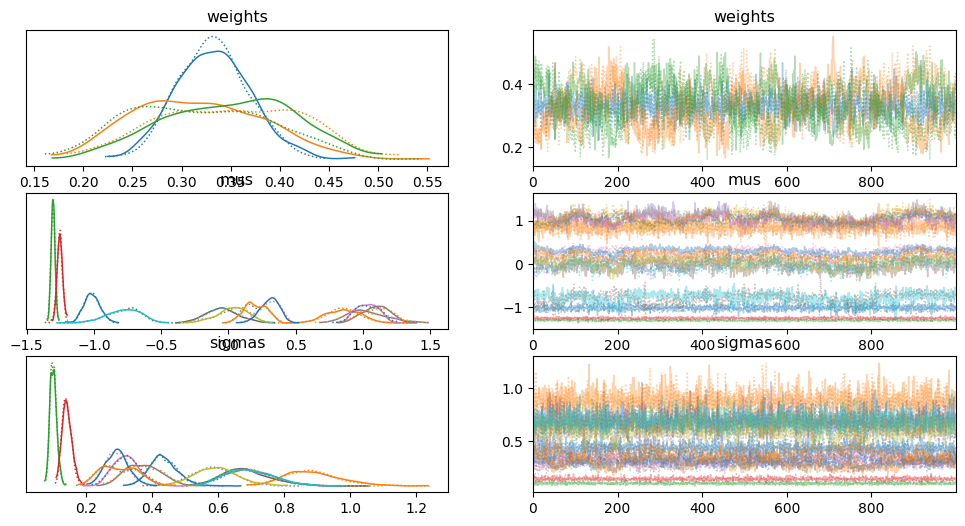

In [8]:
# Subiectul 2

import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
from sklearn.preprocessing import StandardScaler

file_path = "iris.csv"
data = pd.read_csv(file_path)

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(data.iloc[:, :-1])

num_clusters = 3

with pm.Model() as model:
    weights = pm.Dirichlet("weights", a=np.ones(num_clusters))

    mus = pm.Normal("mus", mu=0, sigma=5, shape=(num_clusters, iris_scaled.shape[1]))
    sigmas = pm.HalfNormal("sigmas", sigma=1, shape=(num_clusters, iris_scaled.shape[1]))
    
    covariances = pm.Deterministic("covariances", sigmas**2)
    cluster = pm.Categorical("cluster", p=weights, shape=iris_scaled.shape[0])

    obs = pm.Normal("obs", mu=mus[cluster], sigma=sigmas[cluster], observed=iris_scaled)
    trace = pm.sample(1000, tune=1000, return_inferencedata=True, cores=2)

az.plot_trace(trace, var_names=["weights", "mus", "sigmas"])
print(az.summary(trace, var_names=["weights", "mus", "sigmas"]))



In [ ]:
#2.b

# Analizam distributia pe clustere, calculand media si deviata standard. 
# Pentru a vedea ce caracteristica a separat cel mai bine datele, ne uitam la media fiecarui cluster sa fie diferita.